
Census Income

Project Description

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.
Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

1.	A single cell estimate of the population 16+ for each state.

2.	Controls for Hispanic Origin by age and sex.

3.	Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

Dataset Link-


https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv




In [1]:
#import important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()


# Importing dataset

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


We observe that in this data set numerical as well as categorical data is present

In [3]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


# Exploratory data analysis

In [4]:
#checking the null value of  column of dataset
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

We observe that there is no missing value and no null value present

In [5]:
print("Number of null or missing values in dataset",df.isnull().sum().sum())

Number of null or missing values in dataset 0


<Axes: >

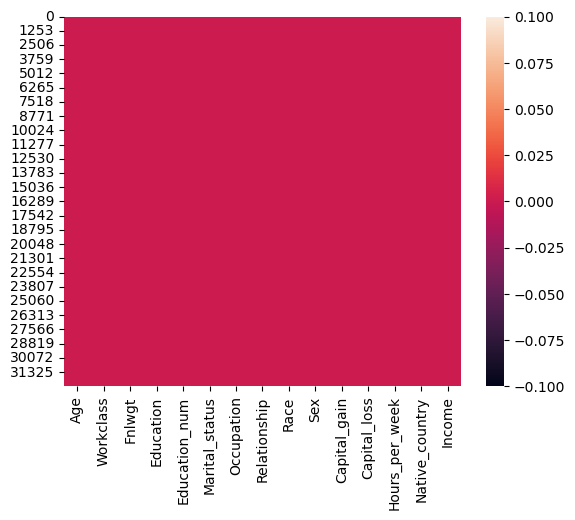

In [6]:
#checking the null value of  column of dataset by heat map
sns.heatmap(df.isnull())

we observe that there is no  null value present

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


we observe that there is no  null value in any feature

In [8]:
#checking the shape of dataset
df.shape

(32560, 15)

we observe that there is 32560 row and 15 column are present

In [9]:
#checking the column of dataset
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [10]:
# to convert index from row to column
df.columns.tolist()

['Age',
 'Workclass',
 'Fnlwgt',
 'Education',
 'Education_num',
 'Marital_status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Capital_gain',
 'Capital_loss',
 'Hours_per_week',
 'Native_country',
 'Income']

In [11]:
#checking the types of column of dataset
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

we observe that there is two datatype are present int and object

In [12]:
#checking the unique values of column of dataset
df.nunique().to_frame("No. of unique values")

,No. of unique values
Age,73
Workclass,9
Fnlwgt,21647
Education,16
Education_num,16
Marital_status,7
Occupation,15
Relationship,6
Race,5
Sex,2


We observe that our target Income have two unique value 

In [13]:
#checking the null value of all column of dataset
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64


 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64


164190    13
203488    13
123011    13
148995    12
126675    12
          ..
325573     1
140176     1
318264     1
329205     1
257302     1
Name: Fnlwgt, Length: 21647, dtype: int64


 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype

In [14]:
df["Income"].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

We observe that income more than 50k  is 7841 population and income less than or equal to 50k population is 24719.

In [15]:
#checking the categorical& numerical value of all column of dataset
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        categorical_col.append(i)
print("Categorical columns:",categorical_col)
print("\n")

numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        numerical_col.append(i)
print("Numerical columns:",numerical_col)

Categorical columns: ['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']


Numerical columns: ['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']


There are 6 Numerical column are present and 9 Categorical columns also present

# Description of data set

In [16]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


This gives the all statical information of the numerical columns.There is no negative or 
invalid value is present hence we can say that it is perfect

we can obserbe these points:
    
1.The counts of all columns are  same it means there is no missing value in any column

2.The mean value is more than median(50%) in approx all features it means there is right hand skewness

3.There is no columns in which mean value is less than median(50%) hence there no left hand skewness

4.There is major difference beteen 75% and max in all features it means the outliers are present in these columns

5.In this discription min,std and 25% ditail also found

# Encoding columns value

In [17]:
import sklearn
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Income']=le.fit_transform(df['Income'])
df['Income']

0        0
1        0
2        0
3        0
4        0
        ..
32555    0
32556    1
32557    0
32558    0
32559    1
Name: Income, Length: 32560, dtype: int32

In [18]:

df['Workclass']=le.fit_transform(df['Workclass'])
df['Workclass']

0        6
1        4
2        4
3        4
4        4
        ..
32555    4
32556    4
32557    4
32558    4
32559    5
Name: Workclass, Length: 32560, dtype: int32

In [19]:

df['Education']=le.fit_transform(df['Education'])
df['Education']

0         9
1        11
2         1
3         9
4        12
         ..
32555     7
32556    11
32557    11
32558    11
32559    11
Name: Education, Length: 32560, dtype: int32

In [20]:

df['Marital_status']=le.fit_transform(df['Marital_status'])
df['Marital_status'] 

0        2
1        0
2        2
3        2
4        2
        ..
32555    2
32556    2
32557    6
32558    4
32559    2
Name: Marital_status, Length: 32560, dtype: int32

In [21]:

df['Occupation']=le.fit_transform(df['Occupation'])
df['Occupation']

0         4
1         6
2         6
3        10
4         4
         ..
32555    13
32556     7
32557     1
32558     1
32559     4
Name: Occupation, Length: 32560, dtype: int32

In [22]:

df['Relationship']=le.fit_transform(df['Relationship'])
df['Relationship']

0        0
1        1
2        0
3        5
4        5
        ..
32555    5
32556    0
32557    4
32558    3
32559    5
Name: Relationship, Length: 32560, dtype: int32

In [23]:

df['Race']=le.fit_transform(df['Race'])
df['Race']

0        4
1        4
2        2
3        2
4        4
        ..
32555    4
32556    4
32557    4
32558    4
32559    4
Name: Race, Length: 32560, dtype: int32

In [24]:

df['Sex']=le.fit_transform(df['Sex'])
df['Sex']

0        1
1        1
2        1
3        0
4        0
        ..
32555    0
32556    1
32557    0
32558    1
32559    0
Name: Sex, Length: 32560, dtype: int32

In [25]:
df['Native_country']=le.fit_transform(df['Native_country'])
df['Native_country']

0        39
1        39
2        39
3         5
4        39
         ..
32555    39
32556    39
32557    39
32558    39
32559    39
Name: Native_country, Length: 32560, dtype: int32

# Data visualization

0    24719
1     7841
Name: Income, dtype: int64


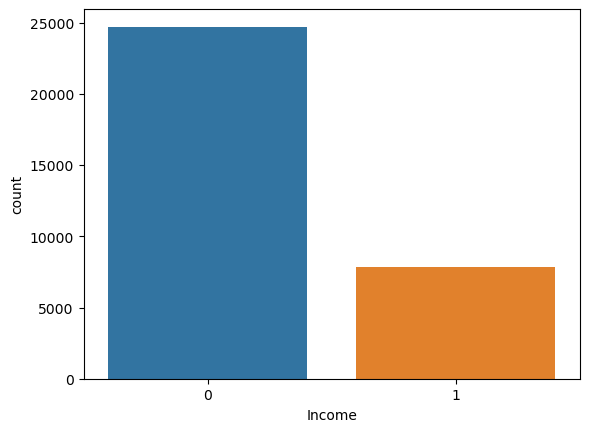

In [26]:
#visualizing the no of Loan_Status
ax=sns.countplot(x='Income',data=df)
print(df['Income'].value_counts())

We observe that 24719 population have less than or equal 50k income and only 7841 population have more than 50k income

[Text(0.5, 1.0, 'Education effect on Income')]

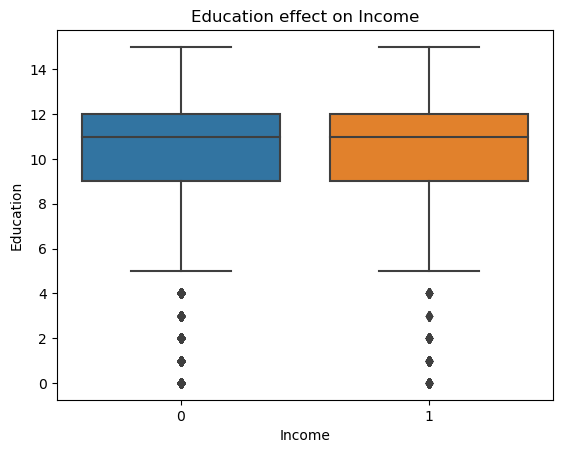

In [27]:
bp = sns.boxplot(x='Income',y='Education', data=df)
bp.set(title="Education effect on Income")

we observe that there is no effect of education on income less or high

11    10501
15     7291
9      5354
12     1723
8      1382
1      1175
7      1067
0       933
5       646
14      576
6       514
2       433
10      413
4       333
3       168
13       51
Name: Education, dtype: int64


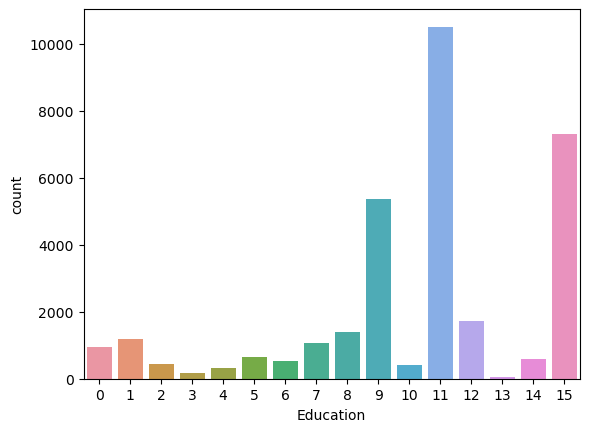

In [28]:
ax=sns.countplot(x='Education',data=df)
print(df['Education'].value_counts())

we observe that count of educated member is high at 9,11,15

1    21789
0    10771
Name: Sex, dtype: int64


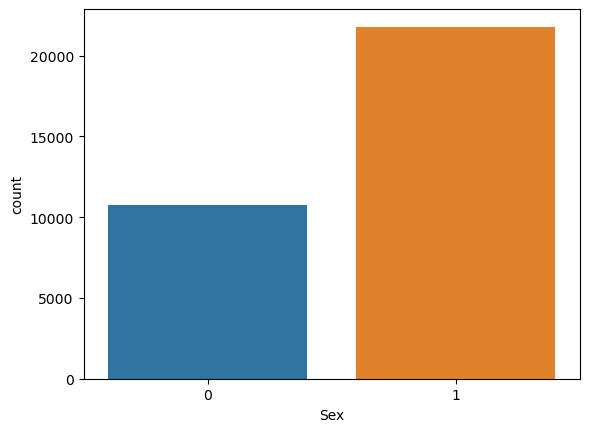

In [29]:
ax=sns.countplot(x='Sex',data=df)
print(df['Sex'].value_counts())

we observed that female count is less than male

[Text(0.5, 1.0, 'Sex effect on Income')]

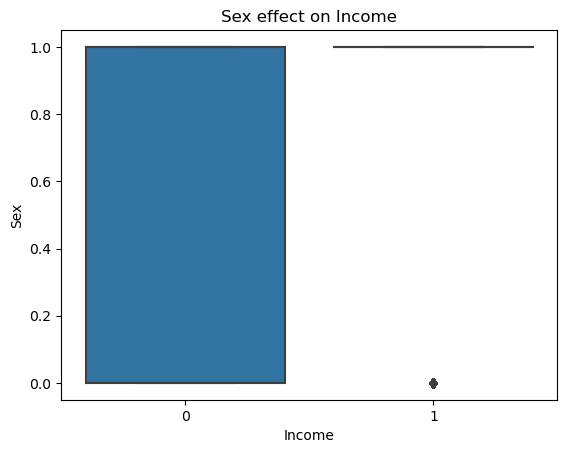

In [30]:
bp = sns.boxplot(x='Income',y='Sex', data=df)
bp.set(title="Sex effect on Income")

we observe that gender status does not affect on income status

[Text(0.5, 1.0, 'Capital_gain effect on attrition')]

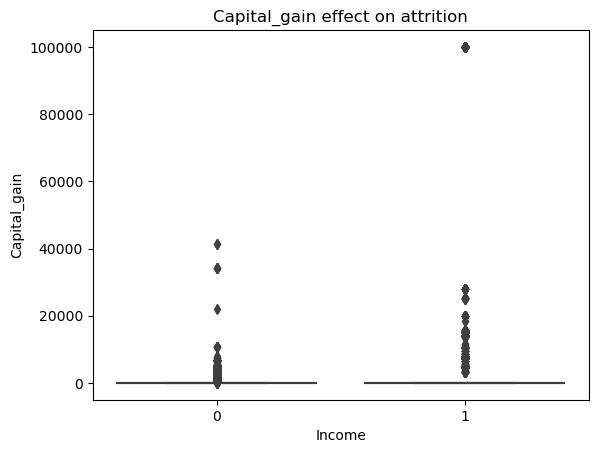

In [31]:
bp = sns.boxplot(x='Income',y='Capital_gain', data=df)
bp.set(title="Capital_gain effect on attrition")

we observe that effect of Capital_gain approx same 

[Text(0.5, 1.0, 'Age')]

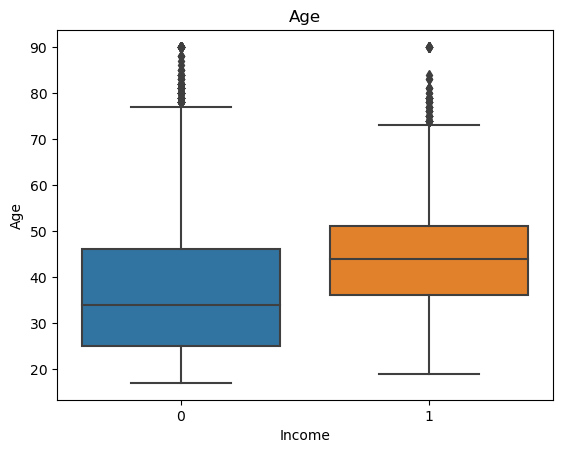

In [32]:
bp = sns.boxplot(x='Income',y='Age', data=df)
bp.set(title="Age")

we observe that higher age directly affect income

[Text(0.5, 1.0, 'Fnlwgt')]

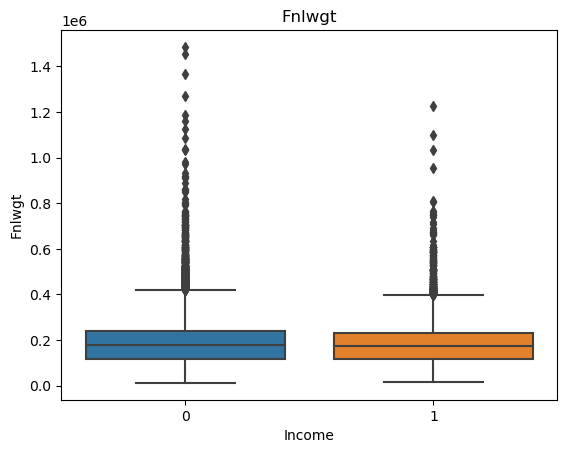

In [33]:
bp = sns.boxplot(x='Income',y='Fnlwgt', data=df)
bp.set(title="Fnlwgt")

we observe that Fnlwgt is high then income is less

# Cleaning of dataset

In [34]:
df.drop(['Relationship'], axis=1, inplace=True)

In [35]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,83311,9,13,2,4,4,1,0,0,13,39,0
1,38,4,215646,11,9,0,6,4,1,0,0,40,39,0
2,53,4,234721,1,7,2,6,2,1,0,0,40,39,0
3,28,4,338409,9,13,2,10,2,0,0,0,40,5,0
4,37,4,284582,12,14,2,4,4,0,0,0,40,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,257302,7,12,2,13,4,0,0,0,38,39,0
32556,40,4,154374,11,9,2,7,4,1,0,0,40,39,1
32557,58,4,151910,11,9,6,1,4,0,0,0,40,39,0
32558,22,4,201490,11,9,4,1,4,1,0,0,20,39,0


after droping unrelavent column we have 614 row and 13 column are present

In [36]:
df.groupby('Income').mean()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
Income,,,,,,,,,,,,,
0,36.783648,3.826449,190345.429467,10.125369,9.594927,2.780857,6.393220,3.631498,0.611958,148.670537,53.145071,38.840163,36.648974
1,44.249841,4.002296,188005.000000,10.843260,11.611657,2.078816,7.139395,3.774136,0.849637,4006.142456,195.001530,45.473026,36.938911


we observe that male customer gate more more than female and 84 percent of male get more than 50k 

In [37]:
df.groupby('Sex').mean()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Race,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Sex,,,,,,,,,,,,,
0,36.858230,3.670133,185746.311206,10.448798,10.035744,2.888868,6.089778,3.560579,568.410547,61.187633,36.410361,36.809210,0.109461
1,39.433567,3.967002,191776.692735,10.223829,10.102758,2.474827,6.811740,3.717885,1329.331314,100.217908,42.428198,36.674102,0.305751


In [38]:
df.drop(['Education_num'], axis=1, inplace=True)

In [39]:
df.drop(['Marital_status'], axis=1, inplace=True)

In [40]:
df.drop(['Workclass'], axis=1, inplace=True)

In [41]:
df.drop(['Native_country'], axis=1, inplace=True)

# Correlation Matrix and Heatmap

In [42]:
df.corr()

,Age,Fnlwgt,Education,Occupation,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Income
Age,1.000000,-0.076646,-0.010508,-0.020946,0.028718,0.088832,0.077674,0.057775,0.068756,0.234039
Fnlwgt,-0.076646,1.000000,-0.028156,0.001554,-0.021278,0.026882,0.000437,-0.010259,-0.018770,-0.009481
Education,-0.010508,-0.028156,1.000000,-0.021274,0.014135,-0.027349,0.030047,0.016744,0.055510,0.079311
Occupation,-0.020946,0.001554,-0.021274,1.000000,0.006779,0.080328,0.025511,0.017979,0.080384,0.075448
Race,0.028718,-0.021278,0.014135,0.006779,1.000000,0.087197,0.011143,0.018902,0.041910,0.071853
Sex,0.088832,0.026882,-0.027349,0.080328,0.087197,1.000000,0.048477,0.045572,0.229312,0.215995
Capital_gain,0.077674,0.000437,0.030047,0.025511,0.011143,0.048477,1.000000,-0.031614,0.078409,0.223333
Capital_loss,0.057775,-0.010259,0.016744,0.017979,0.018902,0.045572,-0.031614,1.000000,0.054256,0.150523
Hours_per_week,0.068756,-0.018770,0.055510,0.080384,0.041910,0.229312,0.078409,0.054256,1.000000,0.229690
Income,0.234039,-0.009481,0.079311,0.075448,0.071853,0.215995,0.223333,0.150523,0.229690,1.000000


Text(0.5, 1.0, 'Correlations Among Features')

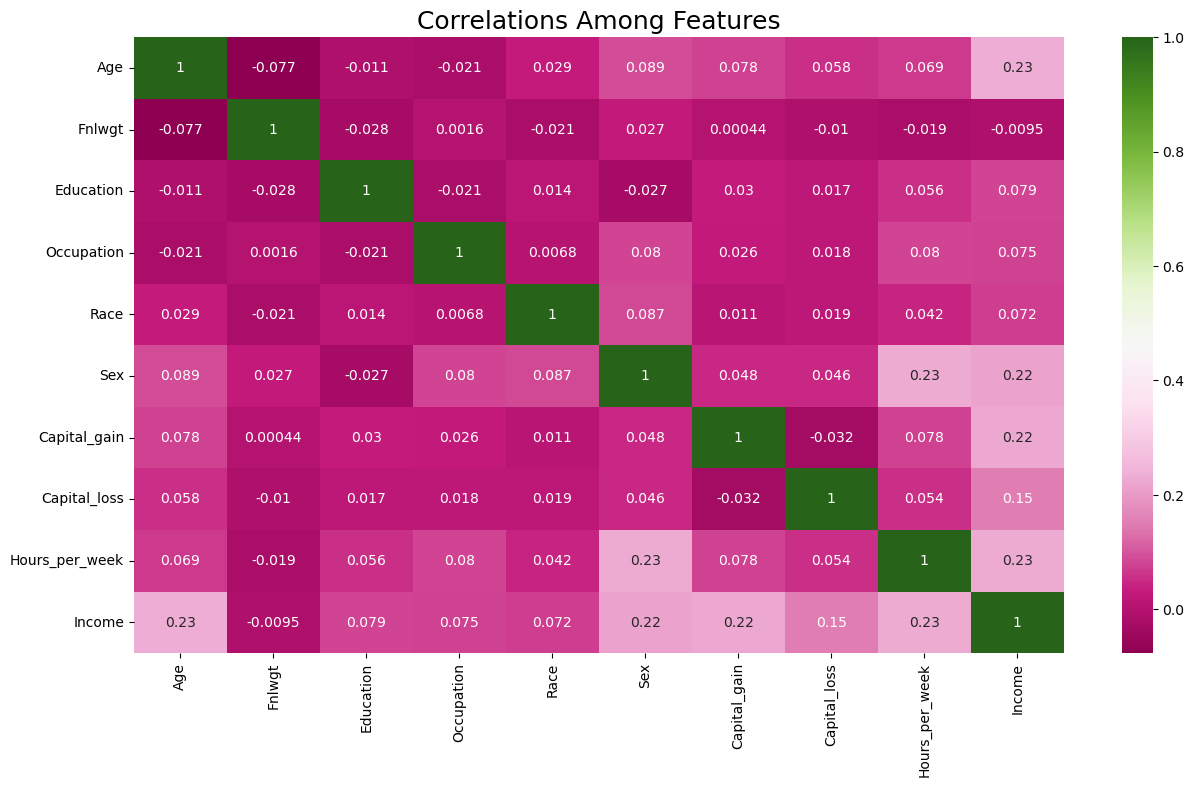

In [43]:
plt.subplots(figsize = (15,8))
sns.heatmap(df.corr(), annot=True,cmap="PiYG")
plt.title("Correlations Among Features", fontsize = 18)

Positive Correlation Features:

Sex, capital gain, capital loss positively related is 0.011 to 0.084.

Negative Correlation Features:

Fnlwt, education negativelly related is -0.0095 and 0.01


In [44]:
df.head()

,Age,Fnlwgt,Education,Occupation,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Income
0,50,83311,9,4,4,1,0,0,13,0
1,38,215646,11,6,4,1,0,0,40,0
2,53,234721,1,6,2,1,0,0,40,0
3,28,338409,9,10,2,0,0,0,40,0
4,37,284582,12,4,4,0,0,0,40,0


In [45]:
df

,Age,Fnlwgt,Education,Occupation,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Income
0,50,83311,9,4,4,1,0,0,13,0
1,38,215646,11,6,4,1,0,0,40,0
2,53,234721,1,6,2,1,0,0,40,0
3,28,338409,9,10,2,0,0,0,40,0
4,37,284582,12,4,4,0,0,0,40,0
...,...,...,...,...,...,...,...,...,...,...
32555,27,257302,7,13,4,0,0,0,38,0
32556,40,154374,11,7,4,1,0,0,40,1
32557,58,151910,11,1,4,0,0,0,40,0
32558,22,201490,11,1,4,1,0,0,20,0


In [46]:
correlations = df.corr()['Income'].sort_values(ascending=False)
print(correlations)

Income            1.000000
Age               0.234039
Hours_per_week    0.229690
Capital_gain      0.223333
Sex               0.215995
Capital_loss      0.150523
Education         0.079311
Occupation        0.075448
Race              0.071853
Fnlwgt           -0.009481
Name: Income, dtype: float64


no data is skewed

<Axes: >

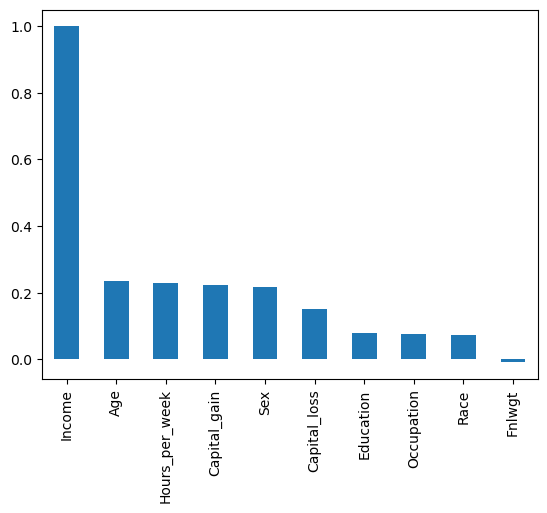

In [47]:
correlations.plot(kind='bar')

we observe that all are positively correlaed

# checking skewness

In [48]:
#checking skewness
df.skew()

Age                0.558738
Fnlwgt             1.446972
Education         -0.934063
Occupation         0.114540
Race              -2.435332
Sex               -0.719244
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Income             1.212383
dtype: float64

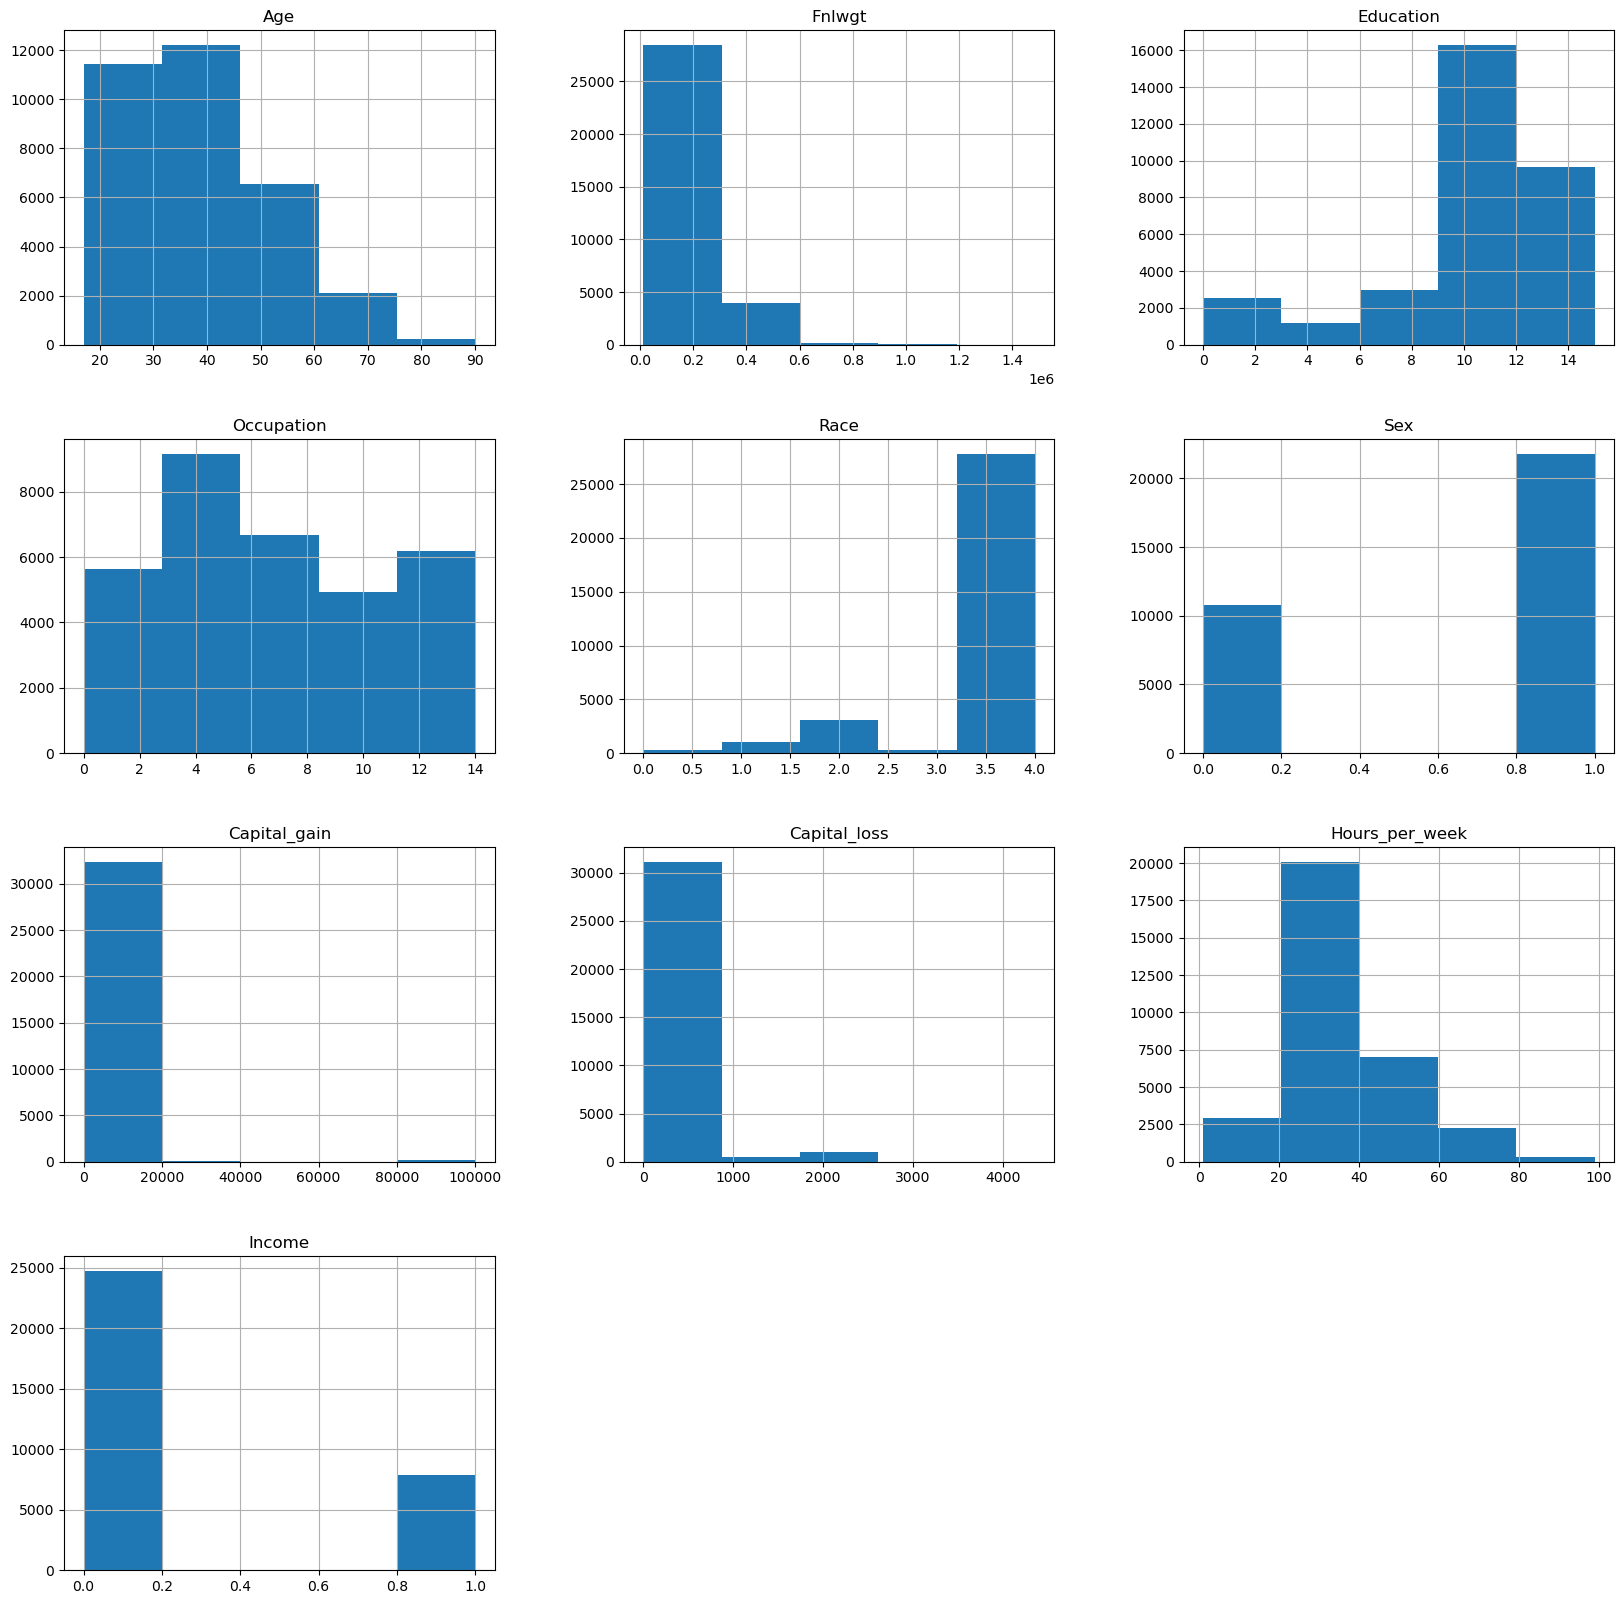

In [49]:
df.hist(bins=5, figsize=(20, 20))
plt.show()

# Reduce skewness

In [50]:
df['Age'] = np.cbrt(df['Age'])

In [51]:
df['Education'] = np.cbrt(df['Education'])

In [52]:
df['Capital_gain'] = np.cbrt(df['Capital_gain'])

In [53]:
df['Capital_loss'] = np.cbrt(df['Capital_loss'])

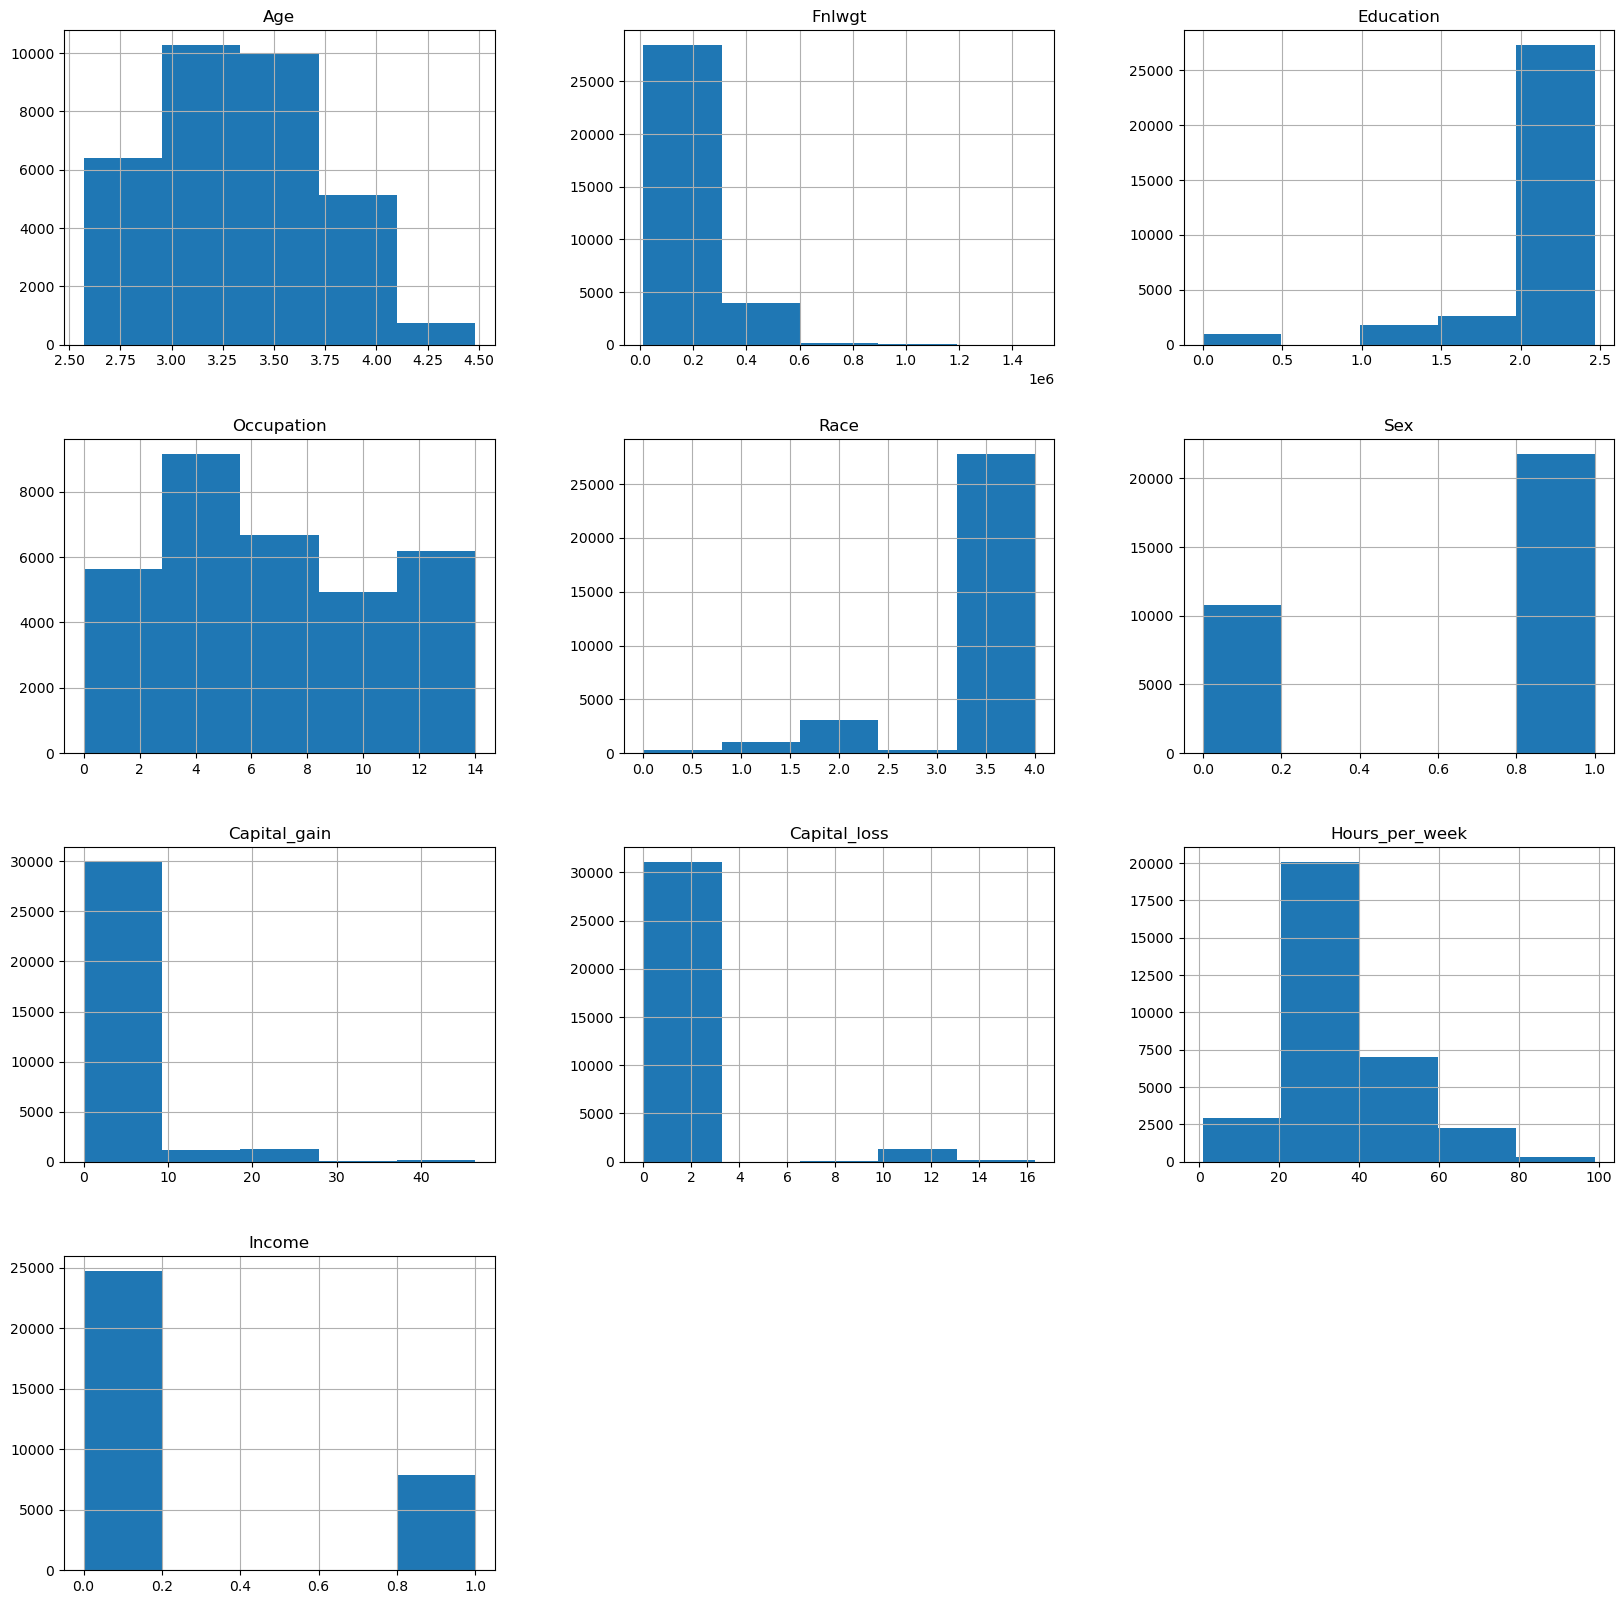

In [54]:
df.hist(bins=5, figsize=(20, 20))
plt.show()

# Feature Selection

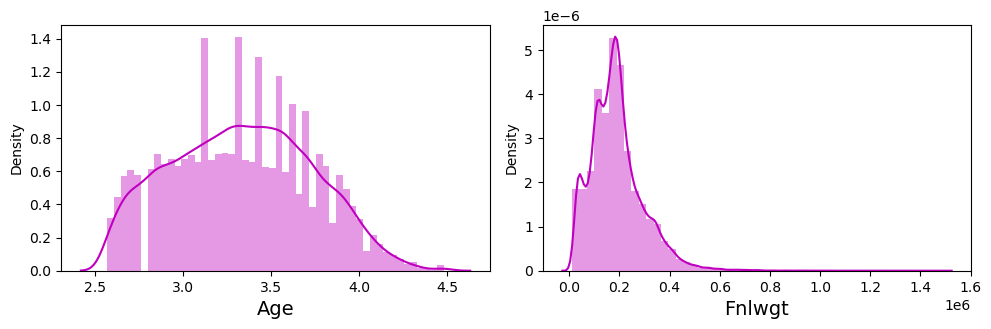

In [55]:
#checking how data is distributed
plt.figure(figsize=(10,6), facecolor ="white")
plotnumber =1
for col in numerical_col:
    if plotnumber<=2:
        ax=plt.subplot(2,2,plotnumber)
        sns.distplot(df[col],color= "m")
        plt.xlabel(col, fontsize = 14)
        plt.yticks(rotation =0,fontsize = 10 )
    plotnumber+=1
plt.tight_layout()

we observe that all features data is normally distributed

# Separating feature and target

In [56]:
x=df.drop("Income", axis= 1)
y=df["Income"]

# Feature Scaling using Standard Scalarization

In [57]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x

,Age,Fnlwgt,Education,Occupation,Race,Sex,Capital_gain,Capital_loss,Hours_per_week
0,0.885683,-1.008742,-0.027102,-0.608434,0.393675,0.703087,-0.278624,-0.220559,-2.222120
1,0.075029,0.245046,0.273641,-0.135480,0.393675,0.703087,-0.278624,-0.220559,-0.035430
2,1.067556,0.425770,-2.284477,-0.135480,-1.962583,0.703087,-0.278624,-0.220559,-0.035430
3,-0.744007,1.408146,-0.027102,0.810427,-1.962583,-1.422298,-0.278624,-0.220559,-0.035430
4,0.000136,0.898170,0.410428,-0.608434,0.393675,-1.422298,-0.278624,-0.220559,-0.035430
...,...,...,...,...,...,...,...,...,...
32555,-0.836106,0.639710,-0.376451,1.519858,0.393675,-1.422298,-0.278624,-0.220559,-0.197407
32556,0.220963,-0.335466,0.273641,0.100997,0.393675,0.703087,-0.278624,-0.220559,-0.035430
32557,1.355995,-0.358811,0.273641,-1.317864,0.393675,-1.422298,-0.278624,-0.220559,-0.035430
32558,-1.334397,0.110927,0.273641,-1.317864,0.393675,0.703087,-0.278624,-0.220559,-1.655200


we scale the data to overcome biasness

# checking variance inflation Factor(vif)

In [58]:
#find vif in each scaled column
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif["VIF values"] =[variance_inflation_factor(x.values, i)
                    for i in range (len(x.columns))]
vif["Features"] = x.columns
vif

,VIF values,Features
0,1.044800,Age
1,1.008320,Fnlwgt
2,1.011546,Education
3,1.011994,Occupation
4,1.009525,Race
5,1.078762,Sex
6,1.033069,Capital_gain
7,1.012821,Capital_loss
8,1.085180,Hours_per_week


we observe by checking vif values the feature not causing multicollineraity problem. in no any one have vif is not
more than 10 so no need to drop any feature.
and there no multicollineraity problem .

In [59]:
y.value_counts()

0    24719
1     7841
Name: Income, dtype: int64

# oversampling

In [60]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x1,y1 = SM.fit_resample(x,y)

In [61]:
y1.value_counts()

0    24719
1    24719
Name: Income, dtype: int64

we observe that all features are balanced

# Model Creation

Finding the best random state

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [63]:
maxAccu = 0
maxRS = 0
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.30, random_state = 200)
RFR = RandomForestClassifier()
RFR.fit(x_train, y_train)
pred = RFR.predict(x_test)
acc = accuracy_score(y_test, pred)
if acc>maxAccu:
        maxAccu = acc
        maxRS  = 200
print("Best accuracy is =",  maxAccu, "at random_state ", maxRS) 

Best accuracy is = 0.8773597626752967 at random_state  200


we observe the best accuracy is 87.73% at random_state 200

# creat train test split

In [64]:
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.30, random_state = 200)

# classification algorithms

In [65]:
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

# RandomForestClassifier

In [66]:
# checking accuracy for RandomForestClassifier
RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)
predRFC= RFC.predict(x_test)
print(accuracy_score(y_test, predRFC)) 
print(confusion_matrix(y_test, predRFC)) 
print(classification_report(y_test, predRFC))

0.8764832793959008
[[6516  917]
 [ 915 6484]]
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      7433
           1       0.88      0.88      0.88      7399

    accuracy                           0.88     14832
   macro avg       0.88      0.88      0.88     14832
weighted avg       0.88      0.88      0.88     14832



we observe that RandomForestClassifier accuracy 87.64%

# LogisticRegression

In [67]:
# checking accuracy for LogisticRegression
LR = RandomForestClassifier()
LR.fit(x_train, y_train)
predLR= LR.predict(x_test)
print(accuracy_score(y_test, predLR)) 
print(confusion_matrix(y_test, predLR)) 
print(classification_report(y_test, predLR))

0.8758764832793959
[[6530  903]
 [ 938 6461]]
              precision    recall  f1-score   support

           0       0.87      0.88      0.88      7433
           1       0.88      0.87      0.88      7399

    accuracy                           0.88     14832
   macro avg       0.88      0.88      0.88     14832
weighted avg       0.88      0.88      0.88     14832



we observe that LogisticRegression acuracy 87.58%

# support vector classifier

In [68]:
# checking accuracy for support vector classifier
svc = SVC()
svc.fit(x_train, y_train)
predsvc= svc.predict(x_test)
print(accuracy_score(y_test, predsvc)) 
print(confusion_matrix(y_test, predsvc)) 
print(classification_report(y_test, predsvc))

0.7709681769147788
[[5404 2029]
 [1368 6031]]
              precision    recall  f1-score   support

           0       0.80      0.73      0.76      7433
           1       0.75      0.82      0.78      7399

    accuracy                           0.77     14832
   macro avg       0.77      0.77      0.77     14832
weighted avg       0.77      0.77      0.77     14832



we observe that support vector classifier accuracy is 77.09%

# ExtraTreeClassifier

In [69]:
# checking accuracy for ExtraTreeClassifier
ET = ExtraTreeClassifier()
ET.fit(x_train, y_train)
predET= ET.predict(x_test)
print(accuracy_score(y_test, predET)) 
print(confusion_matrix(y_test, predET)) 
print(classification_report(y_test, predET))

0.8133090614886731
[[5958 1475]
 [1294 6105]]
              precision    recall  f1-score   support

           0       0.82      0.80      0.81      7433
           1       0.81      0.83      0.82      7399

    accuracy                           0.81     14832
   macro avg       0.81      0.81      0.81     14832
weighted avg       0.81      0.81      0.81     14832



we observe that ExtraTreeClassifier accuracy 81.33%

# Cross Validation Score

In [70]:
from sklearn.model_selection import cross_val_score

cv=5--- it's a fold value 1,2,3,4,5
cross_val_score(modelname, features, targetvariable, cv=foldvalue, scoring='accuracy')


in classification algorithms- default scoring parameter- accuracy
for regression- deafult scoring parameter is - r2 score

In [71]:
# checking cv score for Random Forest Classifier
score = cross_val_score(RFC,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -" ,accuracy_score(y_test, predRFC) - score.mean())

[0.82708845 0.8355344  0.84029484 0.83584152 0.83538084]
0.8348280098280098
Difference between Accuracy score and cross validation score is - 0.04165526956789101


In [72]:
# checking cv score for LogisticRegression
score = cross_val_score(LR,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -" ,accuracy_score(y_test, predLR) - score.mean())

[0.8277027  0.83138821 0.8404484  0.8343059  0.83277027]
0.8333230958230958
Difference between Accuracy score and cross validation score is - 0.04255338745630011


In [73]:
# checking cv score for support vector classifier
score = cross_val_score(svc,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -" ,accuracy_score(y_test, predsvc) - score.mean())

[0.81403563 0.80804668 0.8112715  0.80988943 0.8137285 ]
0.8113943488943489
Difference between Accuracy score and cross validation score is - -0.0404261719795701


In [74]:
# checking cv score for ExtraTreeClassifier
score = cross_val_score(ET,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -" ,accuracy_score(y_test, predET) - score.mean())

[0.78025184 0.7602887  0.77487715 0.77364865 0.78255528]
0.7743243243243243
Difference between Accuracy score and cross validation score is - 0.038984737164348804


Support Vector Classifier is our best model as the difference between accuracy score and cross validation score
is =-0.0404261719795701 and this is least out of all

finaly we observe that Support Vector Classifier is our best model

# Hyper Parameter Tuning

In [83]:
# Support Vector Classifier
from sklearn.model_selection import GridSearchCV

parameters={'kernel':['linear','rbf'],'C':[1,10],'degree':[3,5],'cache_size':[200,400],'max_iter':[-1,-2]}

In [76]:
GCV=GridSearchCV(SVC(),parameters, cv =5)

GCV.fit(x_train,y_train)

GCV.best_params_

In [77]:
Final_model = SVC(C =  10, cache_size = 200, degree = 3, kernel = 'rbf', max_iter = -1)
Final_model.fit(x_train,y_train)
pred = Final_model.predict(x_test)
acc = accuracy_score(y_test, pred)
print(acc*100)

78.10814455231932


# Plotting ROC compare auc for all the models used

In [78]:
#Plotting ROC compare auc for all the models used here
from sklearn import datasets
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

Plotting ROC compare auc for best model

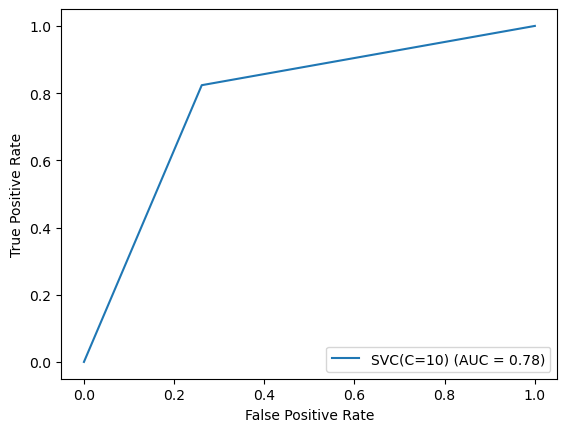

In [79]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=Final_model)
display.plot()

# Saving the model

In [80]:
#saving the model using .pkl
import joblib
joblib.dump(Final_model,"Third_Phase_Evaluation_Project_1_Census_Income_Prediction_Project_Analysis.pkl")

['Third_Phase_Evaluation_Project_1_Census_Income_Prediction_Project_Analysis.pkl']

# predicting the saved model

In [81]:
# first we load the saved model and get prediction
model = joblib.load("Third_Phase_Evaluation_Project_1_Census_Income_Prediction_Project_Analysis.pkl")

#prediction
prediction = model.predict(x_test)
prediction

array([1, 1, 0, ..., 1, 1, 0])

# These Are the Prediction for Attrition 

In [82]:
a = np.array(y_test)
df = pd.DataFrame()
df["Predicted"] = prediction
df["Original"] = a
df

,Predicted,Original
0,1,1
1,1,0
2,0,0
3,0,1
4,1,0
...,...,...
14827,1,0
14828,1,0
14829,1,1
14830,1,1


our findings

Support Vector Classifier is our best model as the difference between accuracy score and cross validation score is =-0.0404261719795701 and this is least out of all

finaly we observe that Support Vector Classifier is our best model
before hyper tuning support vector classifier accuracy is 77.09% and after hyper tuning it is 78.10

finally we observe that Support Vector Classifier is our best model
we also observe that after visualization of features and doing other EDA we find in Income Marital_status, Occupation, Relationship,Race, Sex, Capital_gain,Capital_loss, Hours_per_week, Native_country features are directly related . 
other findings
1.We observe that there is no missing value and no null value present.
2.We observe that there is 32560 row and 15 column are present.
3.We observe that our target Income have two unique value.
4.We observe that income more than 50k is 7841 population and income less than or equal to 50k population is 24719.
5.There are 6 Numerical column are present and 9 Categorical columns also present.
6.We observe that gender status does not affect on income status.
7.we observe that Fnlwgt is high then income is less.
